## Predicting Heart Disease using Machine Learning






# 1. Problem Definition

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

# 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

# 4. Features

Data Dictionary


The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1] age - age in years

2] sex - (1 = male; 0 = female)

3] cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
            
4] trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
    
5] chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
    
6] fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
    
7] restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
    
8] thalach - maximum heart rate achieved

9] exang - exercise induced angina (1 = yes; 0 = no)

10] oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
    
11] slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
            
12] ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
    
13] thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
            
14] target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## LOADING THE LIBRARIES AND MODULES

In [4]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [6]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploratory Data Analysis [EDA]

In [7]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# To check how many positive (1) and negative (0) samples are there in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

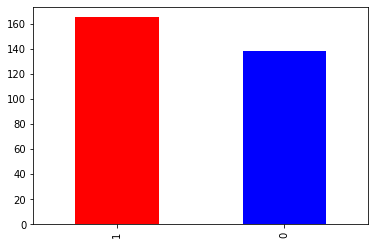

In [20]:
df.target.value_counts().plot(kind="bar",color =["red", "blue"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

In [23]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [25]:
# Compare target column with sex column
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

In [27]:
over_50 = df[df['age'] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


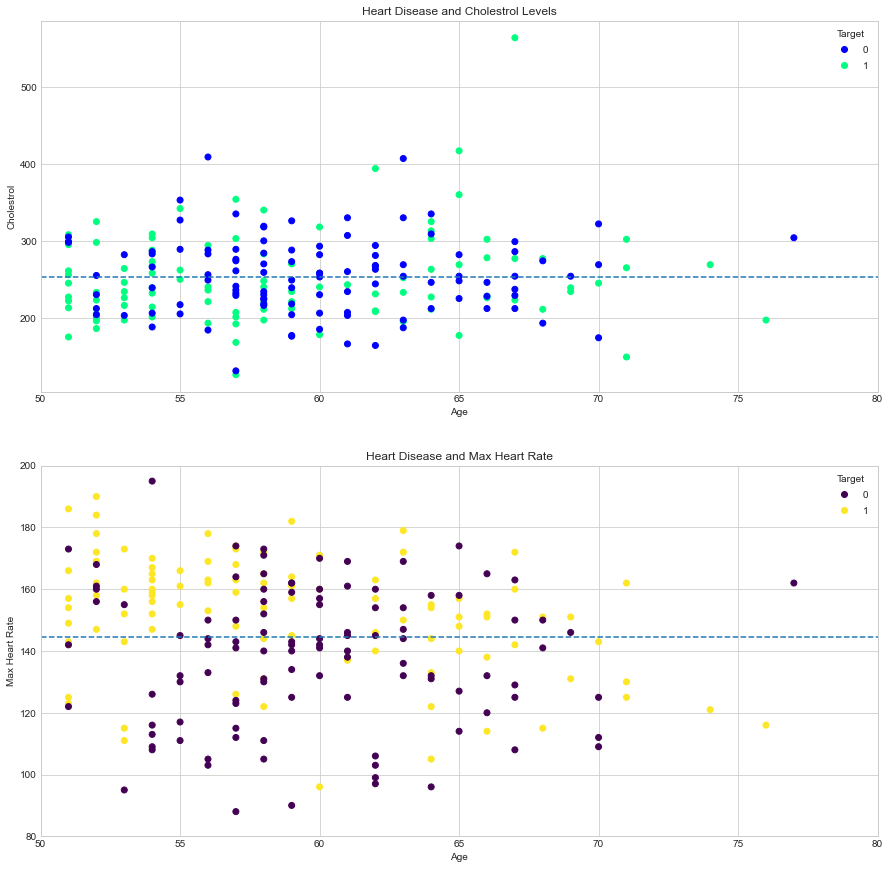

In [28]:
plt.style.use('seaborn-whitegrid')

fig, (ax0 , ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(15,15))
# axis 0

scatter = ax0.scatter(x=over_50['age'],
                      y=over_50['chol'],
                      c=over_50['target'],
                      cmap='winter');

ax0.set(title="Heart Disease and Cholestrol Levels",
        xlabel="Age",
        ylabel="Cholestrol");

ax0.set_xlim([50,80]);

ax0.legend(*scatter.legend_elements(),title="Target");

ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

#axis 1

scatter = ax1.scatter(x=over_50['age'],
                      y=over_50['thalach'],
                      c=over_50['target'],
                      cmap='viridis');

ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate");

ax1.set_xlim([50,80]);

ax1.set_ylim([80,200]);

ax1.legend(*scatter.legend_elements(),title="Target");

ax1.axhline(y=over_50['thalach'].mean(),
            linestyle='--');



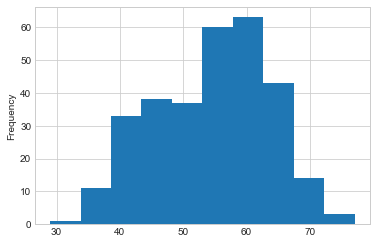

In [30]:
df.age.plot.hist()

### Correlation between independent variables 

We'll compare all of the independent variables in one hit using df.corr().
This will create a co relation matrix and show us how the feature and target labels are related to each other

In [31]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


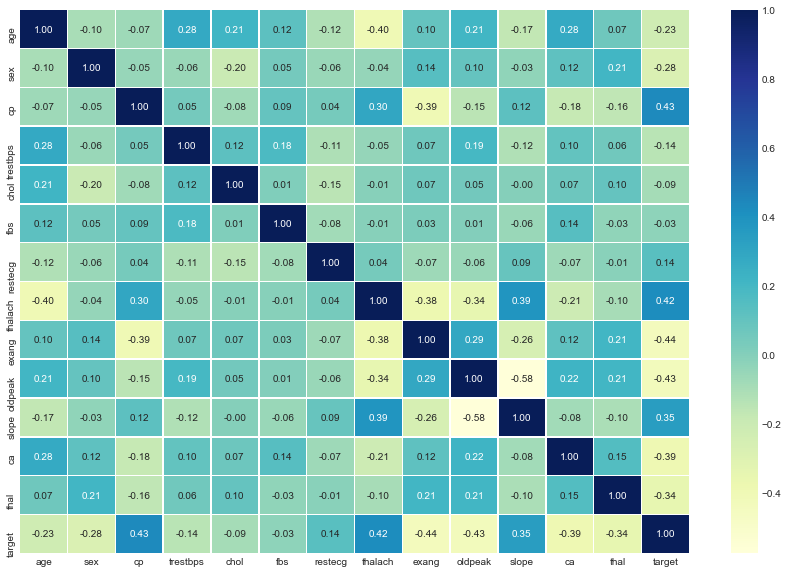

In [32]:
#Creating a co-relation matrix using Seaborn Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Modeling

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
# Feature variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [36]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Training and test split

Splitting your data into a training set and a test set.

Using the training set we will train model and with the test set we will test the model which has been trained with the training set

In [41]:
#Setting up the random seed for reproducibility
np.random.seed(42)

X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size=0.2)

The test_size parameter is used to tell the train_test_split() function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on.

In [42]:
#Instantiating RandomForestClassifier 
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
np.array(cross_val_score(model,X,y,cv=5)).mean()*100

82.16393442622952

In [43]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

COMPARING THE PREDICTIONS TO THE TRUTH LABELS TO EVALUATE THE MODEL

In [45]:
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

### EVALUATING USING ACCURACY SCORE

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8524590163934426

### EVALUATING USING ROC CURVE

In [47]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)

y_probs[:10] , len (y_probs)

(array([[0.88333333, 0.11666667],
        [0.46666667, 0.53333333],
        [0.45      , 0.55      ],
        [0.81666667, 0.18333333],
        [0.18333333, 0.81666667],
        [0.16666667, 0.83333333],
        [0.33333333, 0.66666667],
        [0.95      , 0.05      ],
        [0.98333333, 0.01666667],
        [0.43333333, 0.56666667]]),
 61)

In [48]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11666667, 0.53333333, 0.55      , 0.18333333, 0.81666667,
       0.83333333, 0.66666667, 0.05      , 0.01666667, 0.56666667])

In [49]:
#CALCULATING FPR , TPR , THRESHOLDS

fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.20689655,
       0.34482759, 0.4137931 , 0.44827586, 0.51724138, 0.62068966,
       0.68965517, 0.86206897, 0.93103448, 1.        ])

In [50]:
tpr

array([0.     , 0.0625 , 0.15625, 0.25   , 0.3125 , 0.375  , 0.40625,
       0.46875, 0.5625 , 0.625  , 0.625  , 0.65625, 0.75   , 0.8125 ,
       0.8125 , 0.84375, 0.875  , 0.875  , 0.9375 , 0.96875, 0.96875,
       0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 1.     , 1.     ,
       1.     ])

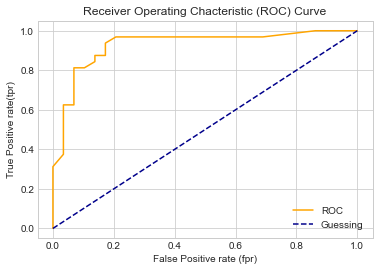

In [51]:
#CREATING A FUNTION FOR PLOTTING THE ROC CURVE

import matplotlib.pyplot as plt


def plot_roc_curve(fpr,tpr):
    """Plots a ROC curve given the false postive rate (fpr)
    and true positive rate (tpr)
    """
    #Plotting the roc curve
    plt.plot(fpr,tpr,color ="orange" , label= "ROC")
    
    #Plotting line with no predictive power(baseline)
    plt.plot([0,1],[0,1] , color="darkblue" , linestyle = "--" , label= "Guessing")
    
    #Customizing the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate(tpr)")
    plt.title("Receiver Operating Chacteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [52]:
#Area Under Curve (AUC) SCORE

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9283405172413792

### EVALUATING USING CONFUSION MATRIX

In [53]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_preds)

conf_mat

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [54]:
#Visualizing Confusion Matrix using pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


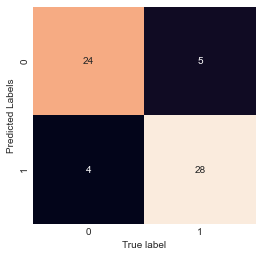

In [55]:
#Making a Confusion Matrix using Seaborn library

import seaborn as sns

def plot_conf_mat(conf_mat):
    fig, ax =plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted Labels")
    
plot_conf_mat(conf_mat)

### EVALUATING USING CLASSIFICATION REPORT

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## IMPROVING THE MODEL WITH HYPERPARAMETER TUNING

In [57]:
#Importing the Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Making a Evaluation function
def evaluate_metrics(y_test,y_preds):
    
    accuracy = accuracy_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    metric_dict = {"accuracy": round(accuracy , 2),
                   "precision" : round(precision , 2),
                   "recall" : round(recall , 2),
                   "f1" : round(f1 , 2)}
    
    print(f"ACCURACY: {accuracy * 100:.2f}%")
    print(f"PRECISION: {precision:.2f}")
    print(f"RECALL: {recall:.2f}")
    print(f"F1 SCORE: {f1:.2f}")
    
    return metric_dict
 
evaluate_metrics(y_test,y_preds)

ACCURACY: 85.25%
PRECISION: 0.85
RECALL: 0.88
F1 SCORE: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [58]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### HYPERPARAMETER TUNING WITH RandomizedSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000],
        "max_depth" :[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_leaf":[1,2,4],
        "min_samples_split":[2,4,6]}

#Setting up the random seed
np.random.seed(42)

#Splitting data into X and y
X = df.drop("target",axis= 1)
y = df['target']

#Splitting the data into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiating the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=1)

#Setting up the RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=10, min_samples_split=4, min_sampl

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [60]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [61]:
#Making Predictions with the Best Hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluating the Predictions
rs_metrics = evaluate_metrics(y_test,rs_y_preds)

ACCURACY: 85.25%
PRECISION: 0.85
RECALL: 0.88
F1 SCORE: 0.86


### HYPERPARAMETER TUNING WITH GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

grid_2 = {"n_estimators":[200,500,1000],
          "max_depth" :[5],
          "max_features":["auto","sqrt"],
         "min_samples_leaf":[4],
         "min_samples_split":[4,6]}

#Setting up the random seed
np.random.seed(42)

#Splitting data into X and y
X = df.drop("target",axis= 1)
y = df['target']

#Splitting the data into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiating the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=1)

#Setting up the GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

gs_clf.fit(X_train,y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [4, 6],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [63]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 500}

In [64]:
#Making Predictions with the Best Hyperparameters
gs_y_preds = gs_clf.predict(X_test)

#Evaluating the Predictions
gs_metrics = evaluate_metrics(y_test,gs_y_preds)

ACCURACY: 86.89%
PRECISION: 0.85
RECALL: 0.91
F1 SCORE: 0.88


In [65]:
import pickle

pickle.dump(rs_clf , open("heart1.pkl","wb"))